## Checking + Preprocessing Translated data

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from multiprocessing import Pool
import string
import re

In [2]:
## Visualization
%matplotlib inline
import matplotlib.pyplot as plt

###### Loading dataFrames

In [3]:
raw_test = pd.read_csv('../data/test.csv')
new_test = pd.read_csv('../data/new_test.csv')

In [4]:
f = open('../data/new_test_transed.csv')
dic = {}
for line in f:
    key = line.split(',')[0]
    comment = ' '.join(line.split(',')[1:])
    dic[key] = comment
f.close()

###### Checking dataFrame shape

In [5]:
ref = set("qwertyuiopasdfghjklzxcvbnm1234567890 ")
def getRatio(s):
    n_numalpha = np.array([s.count(c) for c in ref]).sum()
    return 1.*n_numalpha / len(s)

###### Randomly checking 20 sentences

CPU times: user 310 ms, sys: 175 ms, total: 485 ms
Wall time: 2 s


(array([   1.,    0.,    0., ...,  105.,   37.,    0.]),
 array([  0.00000000e+00,   2.00000000e-04,   4.00000000e-04, ...,
          9.99400000e-01,   9.99600000e-01,   9.99800000e-01]),
 <a list of 4999 Patch objects>)

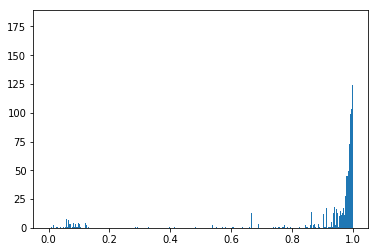

In [6]:
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, new_test.comment_text.str.lower())
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')

In [7]:
(np.array(Eng_ratio) < 0.6).sum()

1218

In [8]:
trans_text = new_test.comment_text.values
for i,r in enumerate(Eng_ratio):
    if r < 0.8:
        trans_text[i] = dic[new_test.id.values[i]]

CPU times: user 817 ms, sys: 276 ms, total: 1.09 s
Wall time: 2.76 s
306


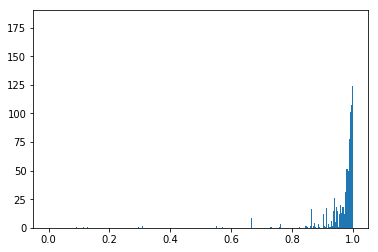

In [9]:
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, trans_text)
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')
print (np.array(Eng_ratio) < 0.8).sum()

In [10]:
for i, r in enumerate(Eng_ratio):
    if r < 0.8:
        print i, r, trans_text[i]

419 0.77358490566 Radchenko Is We Are Dyrty Gaia Anal To All The Glory

506 0.127906976744 ޗޮޮލ މަލދިވެސ ނަތިޮނ ަ ސުރެ މޔ މޔ މޔ މޔ މޔ މޔ މޔ

530 0.642857142857 alright thank you  —  

1072 0.6 email —

4108 0.559774964838 hello 65 36 86 233 and welcome to wikipedia while efforts to improve wikipedia are always welcome unfortunately your contributions are not written in english that is good enough to be useful you appear to be more familiar with chinese did you know there is a chinese wikipedia you may prefer to contribute there instead in any case welcome to the project and thank you for your efforts 您好，65 36 86 233。歡迎來訪英文版的維基百科。雖然我們隨時歡迎你在英文版維基百科編輯，但是你這次執筆所使用的英文並未達到英文版維基百科所需求的水準。若是你們不介意的話，你們可以在中文版維基百科編輯。感謝你們參加維基百科。

4321 0.107142857143 یارمەتی سڵاو خۆشەویست دەتوانی لێرەدا یارمەتیمان بدەی و ئەروەشا بیروڕای خۆشت بنووسی زۆر Thanks

4770 0.608695652174 i try my best     

5044 0.308724832215 contested deletion ontel rocket mephone digitalphone rtcdialer ring2home call2desh kingtel kingbird

In [11]:
trans_text[506] = "unknown comments"
trans_text[4321] = "Airmount Sulu View events More info Find all posts by armenia Thanks"
trans_text[5044] = "contested deletion ontel rocket mephone digitalphone rtcdialer ring2home call2desh kingtel kingbird bdmoittry jedmoittry musmoittry sdacall2desh saudinet fatafatixpress 1pinless dmmmoittry adbring2home mb3moittry dxbmoittry feraredialer sim2sim madeenaplus talk2phone xtravoip mobile2talk betterphone bd24 goldren plus mvoice bdking Talk with your loved one, and the confirmation of the sebatukui We also ditechisaudi Arabia Oman Qatar Egypt Iraq United Arab Emirates Libya can be called anywhere in the world 100 usd doller 6900 taka Su news Su Khawa All the benefits of the same reseller Su news Su Khabar Unlimited Richa Speed ​​System and Mobile Banking Facility Flexiload Bangladesh India Pakistan Nepal Sri Lanka Auto Recharge System Our Services are 1 Flexiload 2 Development 3 Mobile Banking 4 International Recharge 5 Bill Pay 6 Bangladesh Bank Transfer 7 SMS Facility We believe our service will be of your interest. Our payment terms are Bangladesh brac bank islami bank Dubai nbd bank mashreq bank islamic bank Saudi Arabia alrajhi bank ncb bank Oman muscat bank contact any of your needs contact info contact mobile number 8801558 11419 whatsapp number 8801558 11419 viber number 8801558 11419 imo number 8801558 11419 reseller level 4 level 3 level 2 level 1 available"
trans_text[9570] = "kang s official management entlian corp announced it via press release in korean entlian said kang left pride fc and confirmed transper to k 1 hero s he will fight against kazushi sakuraba at yokohama on 17 september 2007 Dennis River has left pride fc 1 Heroes were confirmed on September 17 in Yokohama, Japan K1 competition to be held Sakuraba Kazushi 38 Japan to work with reference spiritmc news release korean but still k 1 official announce is not exist"
trans_text[10573] = "Contemporary TV On Oversight 6 8 2014 Childhood Sheak Sheak Evaluation Toolkit Evaluation Accurate Goodbye Thanksgiving Congratulations to the Congregation of the Congregational Congregation Congregation of India In India, Pregnancy and Loss of Los Angeles are not directly tested that Odisha's Kenyan Mercy's request to open all the words of Miss Shek Shek Shekk's Department of Mate Nutt, Odisha Bansa, Kidney Kidney, This Odisha Oven"
trans_text[16439] = "What a fuck man xd i just fall of my chair cause i could not and i can not stop laugh xd xd xd xd xd oh this is a shit"
trans_text[18465] = "no rs but the actual lyric is shit crap shit shit shit holy shit господня also translates at lord but it s idiomatic which you ll see by google translating this it s not talking about jesus s poo"
trans_text[28793] = "faggot faggot faggot faggot faggot"
trans_text[42860] = "let me tell you fuck you"
trans_text[45000] = "Thorns"
trans_text[58654] = "request for help please greetings mr biplab anand nice to meet me you can help me in a unique maithili language please content True Yashna Graham is a free independent church house, which was the first time in China in Beijing in 1917. The church was then established in 1932 in India. Currently, its members are about 1.5 million to 2.5 million in 45 countries. This churchhouse is also considered as the source location of protestants in the past century. This church was one of the three churches established in 1945 before the Communist regime started in China. They want to give a message to all the countries that Jesus is the second birth of Jesus. These are not considered to be the rules of Jesus 'abstract, but they regard only the rules of Jesus' name. The 10 major beliefs of this church are like this 1 Holy Spirit 1 2 Baptism 1 3 Washing Footage 1 Holy Spirit 1 5 Sabbath Day Saturday 1 6 Jesus Christ 1 7 Holy Bible 1 8 salvation 1 Church 1 10 Final justice will help you Be very gratefully appreciated thankyou very much"
trans_text[64337] = "wiki make ne x this far to do not have any"
trans_text[66376] = "still addressing our critics islam says let's all sit down together and pray that whoever says say about god wrong with something wrong in 61 as a iman. Allah Ali al-Zubair and still addressing our community"
trans_text[71320] = "i wont suck your cock i am a fucking man and i am not gay fucking every day the same shit"
trans_text[73225] = "How can I interact with the Oriya Wikipedia group I want to talk about the Ongoing Wikipedia, and I would like to organize such a group in Rourkelet, so that I will plan anyone. Menera Mashra Rourkela is an end to 1954."
trans_text[76422] = "God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren, or a god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda yuneskaya UN INTO NATO bytyn dynyaya the mygəddəs kynlərdədə Guran kəəbə the the moon of my gods gods god god god the jesus bmt natoya the most sacred ocagla God is God Who is God God is God God God God God God God God God to God God to God God to God god god bmt natoya guran the most sacred hearths gods god god god god god to the jungle godmother the most mysterious hearth gods God god god god to jesus bmt natoya the most sacred hearth gods allah god god god to jesus bmt natoya kaaba the most moon holes allah god god god to heaven all over the world, the most sacred hearth gods god God god god God to heaven the most sacred hearth gods God or God God or God to the gods of the world ASI young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the most sacred hearths of my God, whether God or God, by God Rine FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim be god Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren guran coma is the most sacred hearths allah god or all ah Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether god Huda god, Huda bytyn dynya hokmətlərinə Auschwärtschutzungen Children of the Grandchildren Guran kaabe Most Mycenaean my fucking god Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda bytyn dynya hokmətlərinə FAMILIES dogulasi young grandchildren Guran kəəbə the mygəddəs ocaglar Ghanim Whether God Huda God, Huda yuneskaya UN INTO NATO bytyn dynyaya most mysterious kings are the most sacred hearths gods gods god gods all over the gods all over the gods the most sacred hearth gods God allah god god to jesus bmt natoya the most mogul ocaglar allah god allah god god to jesus"
trans_text[81122] = "it also says right on his talk page that he is that user someone asks him if he s the one that got kicked out of english wikipedia because he wrote about porn stars and asked it gilgamesh a sysop is a dirty It's you who wrote me, I'm Eden Kogan Gilgamesh is a filthy dictator Yeah I guess you should be treated as respectful I noticed that you're really weird You're right You know Gilgamesh Now delete all my contributions I've been working on for a whole year and block me for 24 hours and Uncle Shai does not care that Gilgamesh is a sinner Anyone who is on Wikipedia is Hebrew"
trans_text[81144] = "hey dude what is a policymaking institution dood the question was sincere gaddam ur a fuck retard fuck you fuck you fuck you fuck you fuck you fuck you fuck you fuck you fuck you fuck you fuck you fuck you do not ban me plox this is my brother"
trans_text[82873] = "United States of America"
trans_text[88375] = "unkown comments"
trans_text[89621] = "unkown comments"
trans_text[98851] = "to my friends and enemies bohdan i really need your help with my edits of this day e mail me if any questions where are you anyway they already frightened out крыс and others whom can i fucking ally here irpen that s what i was writing to you on talk soviet partisans right before you arranged my block from a naive westerner recruiting someone i don t get what are you talking about asshole i really don t btw i never participate on any forums except those with advises for pc users i never heard of brama before wikipedia the most important i want i mean it the mess you re talking about unless you stop your propagovandalism like this that s my game don t you get so you are sorry about this all you will regret it all you will regret it by the way I here realized all the adequacy of your nickname ripen the most pro-Russian city of Kiev I'm not talking about the gypsy and the drug addict prostitution tax academy"
trans_text[101941] = "you must know that this is just a coat of arms of the republic on this shirt this is not the same club logo you should understand that this is just an image of the republic's coat of arms on a shirt. It's not the club's logo. The emblem of the republic is legally legally impossible to be the logo of the official club's logo. The leopard is the image file aqbarskazan png see the club's website http www ak bars ru and the site khl http en khl ru clubs you deny official information"
trans_text[102247] = "color black retired giant dicks are hereby blocked henceforth"
trans_text[107770] = "hey guys do not buy keyboards from ebay i am serious"
trans_text[108657] = "I see therefore i learn"
trans_text[110547] = "unknown comments"
trans_text[110976] = "unknown comments"
trans_text[112312] = "ya ya i rav mack belt"
trans_text[122824] = "your a faggot hi there flat out i think your a faggot gday mate"
trans_text[124888] = "you should be hanged from a noose all muslims must die"
trans_text[125376] = "mr e sanchez"
trans_text[127306] = "https www facebook com simon hassan007 https www facebook com simon hassan007 photos albums 1 ۞ 1 ¸¸ ø¤º ° 1 ۩ ŝįϻỗň ĥãŝŝãň ãňįќ 1 ۩ ¸¸ ø¤º ° 1 ۞ 1 I hate love story █████ █████████ 99 I do not add anyone without the knowledge, except knowing only the unknown, never play with these things. Somebody's beliefs Someone's dream Someone's dream of someone's respect Someone's weaknesses, someone's life and somebody's love Do not break anything and learn something to grow. Do not moan the moon in the water, do not moan. Do not just love to see the beautiful face, do not love, but life will not be lost 1 ۞ 1 ¸¸ ø ª ° ° 1 ۩ ☼✿ ☁ The blue sky ☼ ✿ ☁ ☂ Under the roof, alone in the rain ϟ ❅ wet if there is someone with better and better at night ☪ feel alone ♪ ♫ photographs ♪ ♫ looking at the moon ♫ etc. Etc. 웃 সাথে chat with friends and enjoying eating one-on-one fun masatis fun and little bit ツ a banquet ☮✈ want to have a whole country ☮✈ early p And respect for older people like to talk to more share fees? ❣❤❥ Do not like to listen and say the words ☒ Which likes the shortcut label ☑ And want a good friend or happiness, the friend of the danger 3 friend is the photographer Like a tree A real friend is enough for a lifetime. Always be with the friend who will benefit you. 1 ۩ ¸¸ ø¤º ° ° 1 ۞ 1"
trans_text[127690] = "attention respect"
trans_text[130564] = "gay sss poo poo poo poo"
trans_text[138291] = "If you have any questions about how to make a request, please contact us at"
trans_text[149437] = "hi bitch"
trans_text[151796] = "Imdadul Sheikh harun shaikh ऀऀऀ ceasefire conviction can be found on the factory of the factory in India"

CPU times: user 1.38 s, sys: 701 ms, total: 2.08 s
Wall time: 3.08 s
269


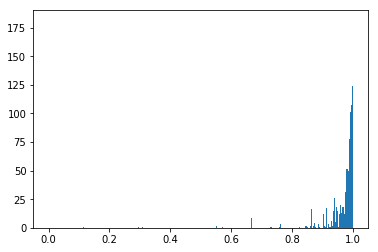

In [12]:
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, trans_text)
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')
print (np.array(Eng_ratio) < 0.8).sum()

In [13]:
def remve_non_utf_8(s):
    s = ''.join(x for x in s if x in string.printable)
    return s

In [14]:
pool = Pool(4)
%time ts = pool.map(remve_non_utf_8, trans_text)
pool.close()
pool.join()
print ts[:20]
trans_text = ts

CPU times: user 1.97 s, sys: 911 ms, total: 2.88 s
Wall time: 5.06 s
['yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time ', ' from rfc the title is fine as it is imo ', ' sources zawe ashton on lapland  ', ' if you have a look back at the source the information i updated was the correct form i can only guess the source hadn t updated i shall update the information once again but thank you for your message ', 'i don t anonymously edit articles at all ', 'thank you for understanding i think very highly of you and would not revert without discussion ', 'please do not add nonsense to wikipedia such edits are considered vandalism and quickly undone if you would like to experiment please 

###### Replace sentences with translated ones if necessary

CPU times: user 294 ms, sys: 273 ms, total: 567 ms
Wall time: 2.16 s
28


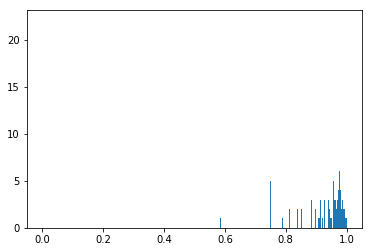

In [15]:
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, trans_text)
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')
print (np.array(Eng_ratio) < 0.8).sum()

In [16]:
for i in range(len(trans_text)):
    trans_text[i] = trans_text[i].lower()

###### Translating by hands

In [17]:
punc = list(set(string.punctuation)) 
punc += ['\n', '\t']
punc = set(punc)
def rmPunc(sent):
    return ''.join([ch for ch in str(sent) if ch not in punc])

In [18]:
pool = Pool(4)
%time ts = pool.map(rmPunc, trans_text)
pool.close()
pool.join()
print ts[:20]
trans_text = ts

CPU times: user 1.3 s, sys: 459 ms, total: 1.75 s
Wall time: 2.98 s
['yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time ', ' from rfc the title is fine as it is imo ', ' sources zawe ashton on lapland  ', ' if you have a look back at the source the information i updated was the correct form i can only guess the source hadn t updated i shall update the information once again but thank you for your message ', 'i don t anonymously edit articles at all ', 'thank you for understanding i think very highly of you and would not revert without discussion ', 'please do not add nonsense to wikipedia such edits are considered vandalism and quickly undone if you would like to experiment please u

###### Remove all non utf-8 characters

In [19]:
for i, sent in enumerate(trans_text):
    if len(sent.replace(" ","")) == 0:
        trans_text[i] = "unknown comments"

In [20]:
def rm_multi_spaces(s):
    return re.sub(' +',' ',s)
pool = Pool(4)
%time ts = pool.map(rm_multi_spaces, trans_text)
pool.close()
pool.join()
print ts[:20]
trans_text = ts

CPU times: user 333 ms, sys: 297 ms, total: 630 ms
Wall time: 1.63 s
['yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time ', ' from rfc the title is fine as it is imo ', ' sources zawe ashton on lapland ', ' if you have a look back at the source the information i updated was the correct form i can only guess the source hadn t updated i shall update the information once again but thank you for your message ', 'i don t anonymously edit articles at all ', 'thank you for understanding i think very highly of you and would not revert without discussion ', 'please do not add nonsense to wikipedia such edits are considered vandalism and quickly undone if you would like to experiment please u

###### Remove multiple spaces

In [21]:
def rm_multi_spaces(s):
    return re.sub(' +',' ',s)

In [23]:
pool = Pool(4)
%time ts = pool.map(rm_multi_spaces, trans_text)
pool.close()
pool.join()
print ts[:20]
trans_text = ts

CPU times: user 414 ms, sys: 548 ms, total: 962 ms
Wall time: 2.22 s
['yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time ', ' from rfc the title is fine as it is imo ', ' sources zawe ashton on lapland ', ' if you have a look back at the source the information i updated was the correct form i can only guess the source hadn t updated i shall update the information once again but thank you for your message ', 'i don t anonymously edit articles at all ', 'thank you for understanding i think very highly of you and would not revert without discussion ', 'please do not add nonsense to wikipedia such edits are considered vandalism and quickly undone if you would like to experiment please u

In [24]:
# new_train.to_csv('train_processed1.csv', index=False)

###### Change numbers into "NUMBERS"

In [25]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
    return False

In [26]:
def replace_number(s):
    return ' '.join(['NUMBERS' if is_number(w) else w for w in s.split(' ')])

In [27]:
pool = Pool(4)
%time ts = pool.map(replace_number, trans_text)
pool.close()
pool.join()
trans_text = ts
print trans_text[:20]

CPU times: user 349 ms, sys: 323 ms, total: 671 ms
Wall time: 16.1 s
['yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time ', ' from rfc the title is fine as it is imo ', ' sources zawe ashton on lapland ', ' if you have a look back at the source the information i updated was the correct form i can only guess the source hadn t updated i shall update the information once again but thank you for your message ', 'i don t anonymously edit articles at all ', 'thank you for understanding i think very highly of you and would not revert without discussion ', 'please do not add nonsense to wikipedia such edits are considered vandalism and quickly undone if you would like to experiment please u

In [29]:
test_processed = pd.DataFrame(new_test)
test_processed.comment_text = trans_text
display(test_processed[:30])

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the inf...
4,00017695ad8997eb,i don t anonymously edit articles at all
5,0001ea8717f6de06,thank you for understanding i think very highl...
6,00024115d4cbde0f,please do not add nonsense to wikipedia such e...
7,000247e83dcc1211,dear god this site is horrible
8,00025358d4737918,only a fool can believe in such numbers the c...
9,00026d1092fe71cc,double redirects when fixing double redirects...


###### REPLACE NUMBERS FIRST

In [34]:
perm = np.random.permutation(len(raw_test))
test_idx = perm[:20]
test_df = pd.DataFrame({
    'raw': raw_test.comment_text.values[test_idx],
    'new': new_test.comment_text.values[test_idx],
    'translated': test_processed.comment_text.values[test_idx],
})
display(test_df)

,new,raw,translated
0,fair use rationale for image hermione granger...,""" \n\n ==Fair use rationale for Image:Hermione...",fair use rationale for image hermione granger...
1,lol stephen suks donkey dick hard nd hairy,LOL STEPHEN SUKS DONKEY DICK HARD ND HAIRY,lol stephen suks donkey dick hard nd hairy
2,if you re asking me if i wish to get a deleti...,:::If you're asking me if i wish to get a dele...,if you re asking me if i wish to get a deleti...
3,enough with the proofs of the hadamard circula...,Enough with the proofs of the Hadamard circula...,enough with the proofs of the hadamard circula...
4,request reinstallment of my god help me to su...,""" \n\n ==Request reinstallment of My God, help...",request reinstallment of my god help me to su...
5,it s already covered two years later in NUMBE...,""" \n\n :It's already covered. """"Two years late...",it s already covered two years later in NUMBE...
6,partly because with source it simply doesn t ...,(partly because with source it simply doesn't ...,partly because with source it simply doesn t ...
7,failure to discuss failure to use edit summar...,"== Failure to discuss, failure to use edit sum...",failure to discuss failure to use edit summar...
8,fuck me helpme why the fuck did you ban me,== fuck me == \n\n [helpme] \n\n Why the fuck ...,fuck me helpme why the fuck did you ban me
9,NUMBERS september NUMBERS utc mostly after th...,", 27 September 2007 (UTC) \n :::Mostly after t...",NUMBERS september NUMBERS utc mostly after th...


###### Remove continuous duplicated words

In [33]:
print new_test.shape, test_processed.shape, raw_test.shape

(153164, 2) (153164, 2) (153164, 2)


In [35]:
test_processed.to_csv('test_processed.csv', index=False)

In [ ]:
plt.hist(L1, bins = np.arange(0, 2000, 10), histtype='bar')

In [ ]:
plt.hist(L2, bins = np.arange(0, 2000, 10), histtype='bar')

In [ ]:
for i,vec in enumerate(ts):
    if len(vec.split(' ')) < 5:
        print i
        print "With dup:", trans_sents[i]
        print "Without dup: ", ts[i]